In [ ]:
import numpy as np
import cv2
import os
import random
import matplotlib.pyplot as plt

In [ ]:

DIRECTORY= r"/content/drive/My Drive/Intelligent Emergency Response System with Automated Vehicle Damage Classification/dataset/train"
CATAGORIES= ['minor','moderate','severe']


In [ ]:
import numpy as np
import cv2
import os
import random
import matplotlib.pyplot as plt

data = []
train_path = DIRECTORY  # No need to append '\train' here

print(train_path)


for categories in CATAGORIES:
    folder=os.path.join(DIRECTORY,categories)
    label=CATAGORIES.index(categories)
    for img in os.listdir(folder):
      img=os.path.join(folder,img)
      img_arr=cv2.imread(img)
      img_arr=cv2.resize(img_arr,(64,64))

      data.append([img_arr,label])






/content/drive/My Drive/Intelligent Emergency Response System with Automated Vehicle Damage Classification/dataset/train


In [ ]:

data


[[array([[[254, 231, 181],
          [254, 231, 181],
          [254, 231, 181],
          ...,
          [161, 145, 142],
          [202, 182, 177],
          [203, 183, 178]],
  
         [[255, 233, 185],
          [255, 233, 185],
          [255, 233, 185],
          ...,
          [203, 188, 186],
          [218, 202, 199],
          [224, 207, 204]],
  
         [[254, 234, 187],
          [255, 235, 188],
          [253, 234, 187],
          ...,
          [230, 216, 214],
          [228, 219, 216],
          [233, 223, 221]],
  
         ...,
  
         [[  3,   7,  12],
          [ 73,  80,  89],
          [ 81,  87,  98],
          ...,
          [  5,   6,   6],
          [  6,   6,   6],
          [  7,   7,   7]],
  
         [[127, 154, 163],
          [129, 154, 170],
          [128, 152, 170],
          ...,
          [  5,   6,   6],
          [  6,   6,   6],
          [  7,   7,   7]],
  
         [[111, 142, 159],
          [109, 137, 162],
          [115, 142, 168

In [ ]:
random.shuffle(data)


In [ ]:

x=[]
y=[]


for features,label in data:
    x.append(features)
    y.append(label)

In [ ]:

X= np.array(x)
Y=np.array(y)


In [ ]:
x

[array([[[  0,   0,   3],
         [ 11,  10,  12],
         [ 63,  63,  63],
         ...,
         [ 25,  13,   9],
         [ 25,  14,  10],
         [ 20,  12,   4]],
 
        [[  9,   9,   9],
         [  8,   9,   7],
         [ 10,  11,   7],
         ...,
         [159, 153, 150],
         [106, 100,  97],
         [ 30,  27,  24]],
 
        [[ 15,  16,  14],
         [ 19,  20,  16],
         [ 36,  38,  32],
         ...,
         [  2,   1,   0],
         [  6,   5,   1],
         [  1,   3,   3]],
 
        ...,
 
        [[ 21,  16,  13],
         [ 23,  18,  15],
         [ 23,  18,  15],
         ...,
         [128, 131, 135],
         [125, 128, 132],
         [126, 129, 133]],
 
        [[ 23,  18,  15],
         [ 24,  19,  16],
         [ 25,  20,  17],
         ...,
         [128, 132, 133],
         [125, 129, 130],
         [132, 136, 137]],
 
        [[ 25,  20,  17],
         [ 27,  22,  19],
         [ 25,  20,  17],
         ...,
         [117, 120, 125],
  

In [ ]:
X=X/255


In [ ]:

X

array([[[[0.        , 0.        , 0.01176471],
         [0.04313725, 0.03921569, 0.04705882],
         [0.24705882, 0.24705882, 0.24705882],
         ...,
         [0.09803922, 0.05098039, 0.03529412],
         [0.09803922, 0.05490196, 0.03921569],
         [0.07843137, 0.04705882, 0.01568627]],

        [[0.03529412, 0.03529412, 0.03529412],
         [0.03137255, 0.03529412, 0.02745098],
         [0.03921569, 0.04313725, 0.02745098],
         ...,
         [0.62352941, 0.6       , 0.58823529],
         [0.41568627, 0.39215686, 0.38039216],
         [0.11764706, 0.10588235, 0.09411765]],

        [[0.05882353, 0.0627451 , 0.05490196],
         [0.0745098 , 0.07843137, 0.0627451 ],
         [0.14117647, 0.14901961, 0.1254902 ],
         ...,
         [0.00784314, 0.00392157, 0.        ],
         [0.02352941, 0.01960784, 0.00392157],
         [0.00392157, 0.01176471, 0.01176471]],

        ...,

        [[0.08235294, 0.0627451 , 0.05098039],
         [0.09019608, 0.07058824, 0.05882353]

In [ ]:

X.shape


(2186, 64, 64, 3)

In [ ]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Activation


In [ ]:

model=Sequential()
model.add( Conv2D(64,(3,3),input_shape=X.shape[1:],activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))

model.add( Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add( Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))


model.add(Flatten())

model.add(Dense(3,activation='softmax'))


In [ ]:

model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Epoch 1/50
62/62 [==============================] - 12s 176ms/step - loss: 1.0762 - accuracy: 0.3940 - val_loss: 1.0501 - val_accuracy: 0.3881
Epoch 2/50
62/62 [==============================] - 10s 159ms/step - loss: 1.0068 - accuracy: 0.4682 - val_loss: 0.9522 - val_accuracy: 0.5525
Epoch 3/50
62/62 [==============================] - 9s 150ms/step - loss: 0.9576 - accuracy: 0.5211 - val_loss: 0.9460 - val_accuracy: 0.5068
Epoch 4/50
62/62 [==============================] - 10s 167ms/step - loss: 0.9494 - accuracy: 0.5216 - val_loss: 0.9646 - val_accuracy: 0.5662
Epoch 5/50
62/62 [==============================] - 11s 170ms/step - loss: 0.9288 - accuracy: 0.5440 - val_loss: 0.9244 - val_accuracy: 0.6027
Epoch 6/50
62/62 [==============================] - 9s 149ms/step - loss: 0.8919 - accuracy: 0.5780 - val_loss: 0.9150 - val_accuracy: 0.5479
Epoch 7/50
62/62 [==============================] - 10s 160ms/step - loss: 0.8814 - accuracy: 0.5821 - val_loss: 0.8860 - val_accuracy: 0.5571
E

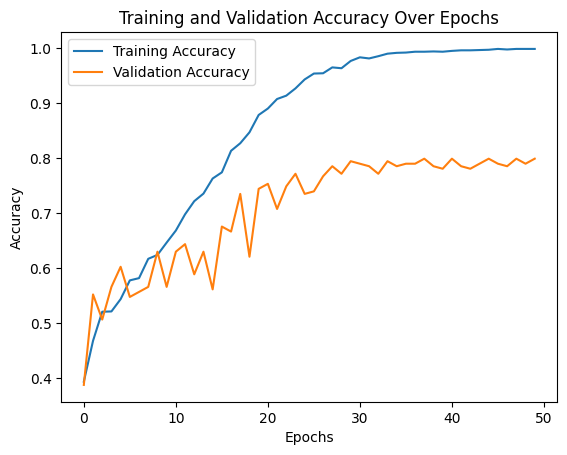

In [ ]:

history = model.fit(X,Y,epochs=50,validation_split=0.1)




# Save the entire model
model.save('/content/drive/MyDrive/Intelligent Emergency Response System with Automated Vehicle Damage Classification/final_model.h5')

# Plot accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



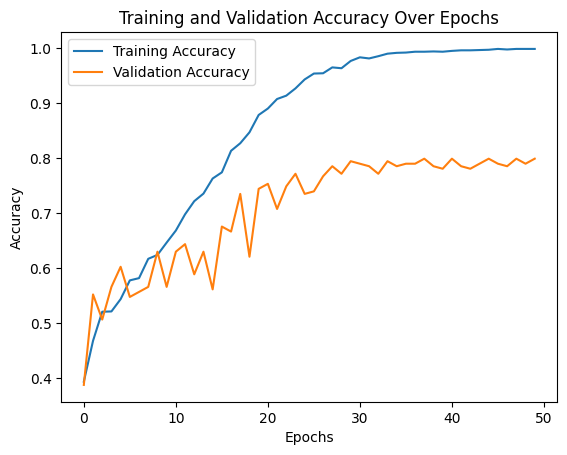

In [ ]:


# Save the entire model
model.save('/content/drive/MyDrive/Intelligent Emergency Response System with Automated Vehicle Damage Classification/final_model.h5')

# Plot accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 62, 62, 64)        1792      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 20, 20, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 18, 18, 32)        18464     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 6, 6, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 32)          9248      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 1, 1, 32)         

In [ ]:

from keras.preprocessing import image
import numpy as np

img_pred=image.load_img(r"/content/drive/MyDrive/Intelligent Emergency Response System with Automated Vehicle Damage Classification/dataset/train/minor/(100).JPEG",target_size=(64,64))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)


results= model.predict(img_pred)

predicted_class_index = np.argmax(results)

# Map the index to the corresponding class name
predicted_class_name = CATAGORIES[predicted_class_index]
print(results)
# Print the results
print(f"The predicted class is: {predicted_class_name}")
print(f"The confidence scores for each class are: {results}")



1/1 [==============================] - 0s 165ms/step
[[1. 0. 0.]]
The predicted class is: minor
The confidence scores for each class are: [[1. 0. 0.]]


1/1 [==============================] - 0s 20ms/step
The predicted class is: moderate
The confidence scores for each class are: [[0.02106307 0.92623913 0.05269789]]


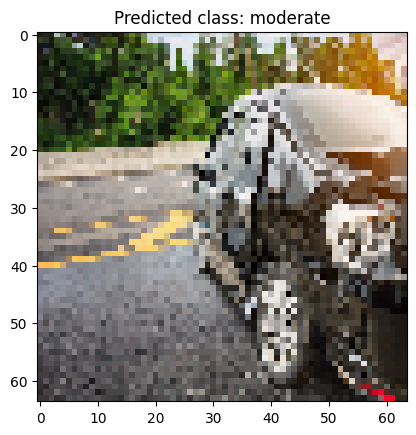

In [ ]:
img_path = "/content/drive/MyDrive/Intelligent Emergency Response System with Automated Vehicle Damage Classification/img_accident3.jpeg"
img = image.load_img(img_path, target_size=(64, 64))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0

results = model.predict(img_array)
predicted_class_index = np.argmax(results)
predicted_class_name = CATAGORIES[predicted_class_index]

# Print the results
print(f"The predicted class is: {predicted_class_name}")
print(f"The confidence scores for each class are: {results}")

# Plot the image
plt.imshow(img)
plt.title(f"Predicted class: {predicted_class_name}")
plt.show()

1/1 [==============================] - 0s 22ms/step
The predicted class is: minor
The confidence scores for each class are: [[9.9999654e-01 2.7577969e-06 7.6130220e-07]]


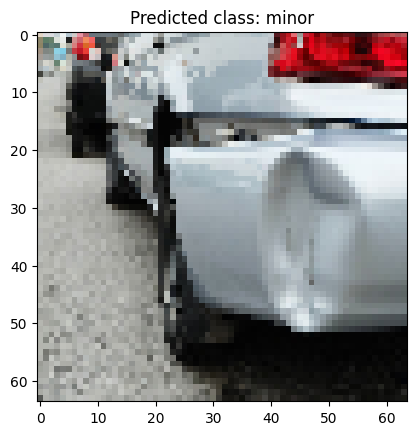

In [ ]:





img_path = "/content/drive/MyDrive/Intelligent Emergency Response System with Automated Vehicle Damage Classification/img_accident_minor.jpg"
img = image.load_img(img_path, target_size=(64, 64))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0

results = model.predict(img_array)
predicted_class_index = np.argmax(results)
predicted_class_name = CATAGORIES[predicted_class_index]

# Print the results
print(f"The predicted class is: {predicted_class_name}")
print(f"The confidence scores for each class are: {results}")

# Plot the image
plt.imshow(img)
plt.title(f"Predicted class: {predicted_class_name}")
plt.show()









1/1 [==============================] - 0s 22ms/step
The predicted class is: severe
The confidence scores for each class are: [[1.9955244e-06 5.4283950e-02 9.4571400e-01]]


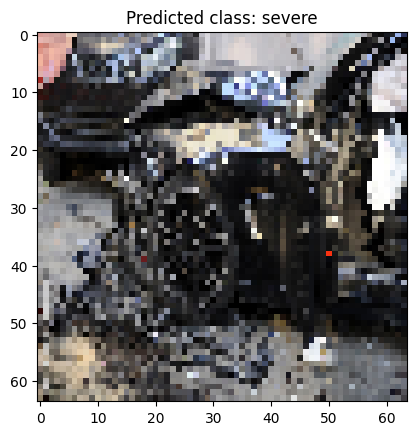

In [ ]:
img_path = "/content/drive/MyDrive/Intelligent Emergency Response System with Automated Vehicle Damage Classification/img_accident.jpg"
img = image.load_img(img_path, target_size=(64, 64))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0

results = model.predict(img_array)
predicted_class_index = np.argmax(results)
predicted_class_name = CATAGORIES[predicted_class_index]

# Print the results
print(f"The predicted class is: {predicted_class_name}")
print(f"The confidence scores for each class are: {results}")

# Plot the image
plt.imshow(img)
plt.title(f"Predicted class: {predicted_class_name}")
plt.show()



In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.1, random_state=42)

In [ ]:
!pip install scikit-learn

In [ ]:
import numpy as np
import cv2
import os
import random
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score  # Add f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint


y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)

# If Y_val is already one-hot encoded, convert it to class indices
if len(Y_val.shape) > 1:
    Y_val_classes = np.argmax(Y_val, axis=1)
else:
    Y_val_classes = Y_val  # Y_val is not one-hot encoded

precision = precision_score(Y_val_classes, y_pred_classes, average='weighted')
recall = recall_score(Y_val_classes, y_pred_classes, average='weighted')
f1 = f1_score(Y_val_classes, y_pred_classes, average='weighted')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

7/7 [==============================] - 1s 66ms/step
Precision: 0.9864141157900672
Recall: 0.9863013698630136
F1 Score: 0.9863283808659458
